In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from TAPE.deconvolution import ScadenDeconvolution, Deconvolution
from TAPE.model import AutoEncoder

In [2]:
expr = pd.read_csv('/Users/chan/Desktop/pythonProject/ROSMAP/ROSMAP_lengthScaledTPM_counts.txt',
                   sep='\t',index_col=0)

In [15]:
sorted = expr.mean(axis=1).sort_values(ascending=False)

for i in sorted.index:
    print(i)

MT-CO1
MT-ND4
MT-ND1
MT-CO3
MT-ATP6
MT-ND2
MT-CO2
MT-ND3
MT-RNR1
MT-CYB
MT-ND4L
MTATP6P1
MT3
MALAT1
ALDOA
MT-TT
NRGN
NAT8L
CLSTN1
RPL41
HNRNPA2B1
TSPYL1
ACTB
RPL37A
CNP
GLUL
ATP6V0E2
NPIPB3
MRFAP1
EIF4H
COX5B
EID1
MTND1P23
DKK3
PRRC2B
CACNG8
CKB
UBB
CALM1
ZCCHC24
NGRN
PRNP
MAP1B
NAPB
RPS27A
EIF5
NDRG4
MT-ATP8
NCKAP1
LINC00599
NAP1L2
PDXK
LINC01123
NEAT1
TMA7
PHF24
PINK1
GPRC5B
NAP1L3
NEFH
KCNJ4
MT-TK
TTYH1
NDUFS5
METRN
MT-TR
ATP1A2
SLC22A17
PNMA8B
FGD5-AS1
SQSTM1
LINGO1
SDC4
DEAF1
RPL13A
DBNDD2
CLU
PNMA3
SIRPA
SAT1
CXCL14
ZFP36L1
HBB
AMER2
CHCHD10
RETREG2
LMO4
MYCBP2
PPIB
UBL3
HK1
RPLP1
MID1IP1
FIS1
LAMP2
SPTBN1
OAZ1
HSPA2
SHISA4
ZBTB18
TTC9B
CLDN5
GP1BB
MTND2P28
PLP1
DEPP1
UQCR10
RPL36AL
SRRM2
PTPRF
DDX24
HSPA1A
SRSF11
MT1G
ATP2A2
FSCN1
OAT
DUSP8
SNTA1
APOLD1
ADD1
ALKBH5
RUNDC3A
ENTPD6
APLP1
CDKN2D
B2M
MBOAT7
PGP
PDIA2
NDUFA11
PANX2
EEF2
SMG5
BEX3
ZNF365
MBP
ATP13A2
BAALC
EIF3I
EVL
ARPC5L
KIF5C
WFS1
BCAN
RPS8
CELF3
DLG4
WASF3
PEG10
SLC25A18
TRIM28
TMEM132A
LENG8
ATP6V0B
TOMM70
ALDH9A1

NPC1
BPTF
FAM181A
GIMAP5
CERS1
MIR4458HG
ARMC5
MT1X
MRPL9
POLR3E
SNHG30
PAXIP1-AS1
DPP6
ARAP3
ALKBH6
AARS
ASB1
SLC30A3
RHPN1
MZT2A
PSMG4
SETD2
TBPL1
CCS
MRPS11
SLITRK3
RGS3
TRABD
TMSB4X
SIDT2
SIK3
LMF2
BICD2
PPIL2
IAH1
TMEM200C
VEGFA
ADK
PTPRZ1
UQCC2
INTS3
CAMK1
TBC1D22B
PRMT7
H2AFZ
CLTC
SPTBN2
SMIM26
CRIM1-DT
CYC1
VKORC1
TSPOAP1
CERS6
MTHFD2L
LINC01003
PSMD13
DCLK1
RPL30
COTL1
DXO
LINC02043
RAB37
EDRF1
ZNRF1
DIPK1C
RAD9A
NKAPL
THAP8
ADAMTS1
BCL11B
ETFDH
NUDT19
CMTM5
MAP1LC3A
AP2A2
IDH3A
ABHD17A
CHGA
FNTA
TAF13
ARHGEF12
ASB13
PPP2R2A
MAPK8IP1
USP4
MIS12
TPT1
WDR89
CADM2
RPL27
CCAR1
TUT4
IFI27L2
SRSF9
IPO11
CACNB3
TNS2
ZNF536
SAE1
AKAP7
C5orf30
GNPTAB
FN1
SH3PXD2A
UBAP2L
RPS16
SIRT5
ZBTB34
ZNF605
RSF1
MTF2
HSPA8
GTF3C1
HAGHL
TUBE1
SREK1
KLHL21
PLCH2
ECI1
CDC42EP4
NKX2-2
RNF165
CD163
BCL2
NSD3
ARID4B
RHOT2
FBXW7
S100B
PACS2
COA6
LINC02389
ZFAND2A
ANKRD49
FASTK
PSMC1
MED14
NPAS2
DHRS4-AS1
PFDN5
INTS5
TESPA1
AK1
LSM7
SNRPD1
ELAVL4
DDA1
SUN1
CTBP1-DT
PTGDS
RAB11FIP4
HSD17B6
CTXN3
JPH4
MARS


PEX1
RAB15
CPT1B
SEPT9
TTLL5
MAPK13
CDK2AP2
PSMG2
VIPR1
PARK7
NPFFR1
DHRS1
OPTN
MRPL49
PDCD5
MANSC1
SUN2
XAF1
NPAT
ANKRD44
SDK1
GDPD3
KIFC3
GPR68
HEMK1
MPP1
HS1BP3
GPAT4
VSNL1
ESYT1
WDR11
LINC00299
IDH3B
SIPA1L1
EGLN2
HILPDA
APOO
ACSBG1
CACUL1
SMIM4
PLAT
RPL23A
SYCP3
NDUFAF8
COMMD9
VPS26C
TMEM59
NCOA7
CBLB
WDR66
ASH1L
ATP5MD
CFL1P1
FMNL3
SH3BGRL3
STAMBP
UBE2D1
VPS37D
ZNF532
ZNF385C
GNB5
FAM50A
MPND
ASNS
GNL1
RIN3
LINC01736
SFR1
DNAAF1
KIAA0100
RPL23AP7
CTTN
ATP5MPL
EIF3H
HNRNPA1P54
APOD
DNAJA2
WWP2
DERL1
PINLYP
FAM57A
USP48
PID1
CDC123
CIRBP
WBP2
MAP3K6
MTCH2
DIAPH1
NEBL
DLX6-AS1
BECN1
TPI1
HSD11B1L
LINC02607
KCNK1
GSTP1
GALNT2
YME1L1
TSGA10
ZCRB1
COX7A2
CTNNB1
SIAE
LINC01783
LINC00173
FENDRR
RENBP
SLC22A5
KANSL3
PPARD
TSPAN3
CYB561D2
TIMM10
DOP1B
TRMT1
MIR124-1
SARS2
BTN3A2
LINC02458
CBFA2T3
LINC01511
LRRC46
CRAT
DDN-AS1
NIPBL
ACYP1
ZCWPW1
BCLAF3
RNU6-9
POLR2I
NDUFAF4
PPP2R5C
KIAA0895
CCDC173
MSRB2
TNS1
EFEMP2
KCNK4
SLC5A11
NIPSNAP2
IGSF22
PHTF2
GPR135
ALDH16A1
DENND4A
RBIS
CDKAL1
MIR

TNKS
PSTK
CDS2
MPZL1
FANCC
HYI
SLC24A1
COL9A3
ANGPTL2
TTC7B
P3H2
WWOX
PDE4B
IDS
PBXIP1
SRP14
MROH1
TRIM27
SH3GLB1
SHISA2
TMLHE
KIF5A
AIMP1P1
MPEG1
AQP4
LY6G5C
GABRB1
SUMF2
LPIN1
RPS15P5
COPG1
ATG3
FOXO4
DPY30
SPECC1L-ADORA2A
BOC
SP110
USP32
TMEM208
HMBS
DDX41
HARBI1
NXN
DMTN
SOD2-OT1
MKRN1
FER
GLE1
KCNMA1-AS1
PSMA4
SETD5
NLRC3
FABP5
MAPK3
IGKC
BRAP
ANKIB1
NRXN3
DNM3
HHIPL1
LARP1
C11orf72
STK3
SMG6
TREM2
MAGI1
GPC2
EAF2
CDIP1
LRP5
IFRD1
SMG9
MPG
CPSF4
PIGF
MXI1
ZKSCAN3
HNRNPA1P5
ANKK1
RALBP1
CENPK
PSTPIP1
FAM133B
C9orf24
SEC14L1P1
FAM162A
JMJD4
TIMMDC1
CLUH
ATL1
VTN
DNTTIP1
RAF1
CRLF3
EIF2B5
UTP14A
SLC25A36
RCOR3
PELP1
NMNAT2
SPHK1
FBXW8
SEC14L1
MSANTD3
COG4
LINC00115
PLK2
SCYL2
FAM20C
C1QTNF6
TECRP1
GBP4
VCAN
NSD2
MTND5P16
MON1B
PRPF31
MPP5
AQR
EEFSEC
CCNB1
FCF1P7
PNCK
CDK16
PLK3
PPID
SKP1
ATG16L2
LGI4
ODF3B
CCT7P1
SP100
PTPRM
CD44
NSMCE4A
ACOX2
MYO1E
YIPF3
BRD8
CMAS
CNGB3
CD320
NEURL4
DIMT1
ZGPAT
A2ML1
JPX
BDH1
F7
PRORSD1P
TNFSF13
CHST5
RBBP4
ST8SIA1
FBH1
IMMT
MIR423
TMPRSS3
JAK3
CTIF

SSBP3
TEX30
TXLNGY
TMEM52
LPAR2
BRD4
SH3RF2
USP8
C1QBP
RPL10P15
SRP68
PRR5L
RPL23P2
MCM5
CHID1
FAM227B
GIMAP4
GOT1
SPIRE2
SLC30A10
MPHOSPH9
MORC4
RTF2
DCSTAMP
EI24
LINC01978
FAM151A
ZNF280A
RANBP1
CDC37L1-DT
AKT3
VDAC1
FOCAD
WDFY1
TMA16
GPX2
ATP11B
ENTPD3
SIGLEC14
WASIR2
EFHB
NDST1
RAB1B
SOGA1
PHF20
MORC2-AS1
ZNF540
C11orf54
SP1
SNHG18
ZNF671
HELZ
CFAP20
THAP5
PPM1B
DCUN1D4
FAM107B
HOMER3
RPL5P23
GDAP2
ADAMTS17
SNAP29
FAM182B
SS18L1
PPFIA2
NSUN3
RNF187
DNAAF2
WDR33
SIM2
PPM1F
NR0B1
SRGN
AGTRAP
SLC31A2
MOB2
TRAPPC1
MIR3976HG
DET1
STMN4
PSMA3-AS1
INPP5D
DOCK4-AS1
C3orf62
CHPT1
TRAPPC6B
AARD
VWA5A
TBC1D5
TNFSF13B
NSUN5
EIF2B4
SLC2A13
GATAD2A
SYN3
ST18
BLOC1S2
SIKE1
ATXN1L
BCAT1
DPY19L2P3
FXR2
PPP2R2D
KIAA1614-AS1
B4GALT2
SPRTN
CLUAP1
MEF2A
TMEFF2
CT75
NCK1
C12orf43
ADCY6
MEIS2
ACSS2
CECR7
DVL1
MKNK2
BIRC6
ACACB
PRKD2
ZBTB44
THRA
S1PR5
CPSF1
PLK1
ITGAE
ATXN7
ARHGAP36
CHST14
GLRB
PAWR
GOLGA8UP
EPG5
GASK1A
GPN3
RNFT1-DT
RNU5B-1
ATAD3C
SAP30L
RPS6KA1
PPIF
EFHD1
CFDP1
HEG1
MTAP
NEDD4L
SFI1
OMA

GNPDA1
LPP-AS2
ZEB2-AS1
PLEKHM1
ATP5MC2P3
FUT2
CELA2A
RGPD5
SHROOM2
MAPK8
UBQLN4
TM9SF4
RHD
PRSS3
LINC01703
SMIM30
UBA52
SPX
CSF3
PGPEP1L
OSTCP5
RPL5P11
E2F6
MAST2
IGSF9B
ZNF821
LINC01907
HLA-H
CYP46A1
TAFA2
ZBTB8A
BLM
CEBPG
KYAT1
TRIM26
BICC1
ETV5
FNIP2
STAT5A
F11R
GAPDHP61
METTL21EP
CP
SS18L2
GRIP1
FBXL12
TNFSF12-TNFSF13
LRRTM3
UBE2V1
ANKRD36
BTBD3
KIF26B-AS1
RPL12P16
IL1RAP
SLC37A1
TARDBP
GUCY2D
IPO9-AS1
NUDT9
METTL3
ARMC3
GAPDHP32
ADM5
MDN1
CD38
FNDC4
ZNF300
LRRC61
AP1M2
REXO5
ZSCAN21
THSD4-AS1
SOX15
PCYT2
KLF17
ERG28
PRRT3-AS1
C9orf129
PPP4R1
POLR2K
RRAGC
ANOS1
NRBP1
RNF112
B3GAT3
TUSC7
PPP1R10
GPR89A
SYVN1
ADD2
LILRA2
SIK2
RPLP0P2
PHF7
ECE1
BTBD10P2
ATP2A1-AS1
PRR29
EPHA5-AS1
NXF1
PARP4
MYO5A
C18orf25
AHR
CKLF-CMTM1
HID1-AS1
APBB1IP
MIOS
RASAL2
HCK
PPP3CC
XPO7
PRPF3
XRCC6
SAP30BP
IGDCC3
ADGRE2
LRRCC1
GEMIN2
SPSB3
GDF9
TLCD1
CDCA8
PA2G4P6
RDM1P5
ANTXR1
LINC02185
ECI2
ATP1B1
TRPS1
PPIH
SLC44A3-AS1
SMARCA5-AS1
TFAP2D
SCARNA5
PCNX1
IGF1
ARPC1A
ATAD3A
NPM1P37
PBX4
ST3GAL3
MSH5
ZNF90
T

UBE2F
ZNF668
GGTA1P
MEGF11
PMP2
SLCO4A1-AS1
RHBDD1
KIAA0319L
RARS
KDELC1P1
TPGS1
MAFK
LIN7C
FSCN2
ERVMER61-1
SMYD5
LMF1-AS1
MMP25-AS1
TSPAN19
RNASEH2C
ZKSCAN7
LBX2-AS1
ENO1
UNC119
LINC00271
PRELID2
IL10
MIGA1
SLC13A5
SHCBP1
B9D2
AMPH
UBE2R2-AS1
PATE4
RABL3
WAPL
ZPR1
ATF4P3
TWIST1
REV1
ARHGAP9
MAP3K20-AS1
FAM104A
ICK
SMAD7
LINC02288
CGRRF1
C12orf66
COL18A1-AS1
CALHM2
TRMT10C
S100P
PRG4
PEX11G
STRN3
NLN
ACOX3
HMOX2
SELENOP
DYRK1B
KCNJ2-AS1
ZNF23
HJV
SLC25A5P6
FRG1JP
HSD17B4
ENTPD7
UNG
SAMD13
RSBN1L
C1DP1
ODF2
DLGAP1-AS5
NKX6-1
CYTH4
ATP9B
FAM201B
HDAC8
MTCYBP3
RINL
RHEBP1
RPS12P20
UNC80
CPPED1
WDFY3
RBM17P4
SHISA9
CYP2C9
CDC34
ACER1
RN7SKP80
OSMR-AS1
EIF4EP1
ORC4
PDZD2
ZNF214
OSGIN2
COX6C
RASGRP4
METTL23
TTC21A
PHYKPL
RNU6-1003P
DAGLB
PTPN4
DTX2
DOCK2
B4GALT3
ACBD7
SKI
GRPEL1
NUP155
TMEM19
THAP12P7
TBC1D10C
KCNN4
HNRNPA1P57
PLK4
PCBD2
LINC01952
SLC36A1
ZNF17
DEDD
FUNDC1
CXCR1
TPST2
ST6GAL2
ALG10
ZBTB21
POFUT2
NLGN3
GAPDHP73
BMPER
ZNF879
SH3BP2
SDF4
DDX11-AS1
NINJ2
FTLP14
BUD31
ZNF350
ZNF

WASHC3
TMX2-CTNND1
RGL2
CARS-AS1
C18orf54
NUP50-DT
LENEP
LGALSL-DT
ABITRAM
LINC00896
ZNF663P
LINC01556
RNU4-82P
CCDC134
GOLM1
CASC1
NSG2
DYSF
PKP2
LINC00857
ANKRD33
NALCN-AS1
HLX
DCP1B
SLIT1
MMP11
CARD16
DNAL1
DAO
GAS1RR
RASSF8
NHSL1
OSBPL8
ZBTB20-AS4
LINC00920
CHKB-DT
C1GALT1C1
GABRB3
ATP1B1P1
NUP35
RGS9BP
KIRREL1-IT1
ENDOU
TSPOAP1-AS1
PAIP1
HNRNPA1P35
NBDY
SLC38A1
LINC02453
PABPC5
FAM160B1
SNORD116-15
TANGO2
C8orf86
CCDC28B
EEA1
C8orf34
BYSL
SYNDIG1
BIVM
PWRN1
SLC45A4
FAM124A
JCAD
CDK17
TP53I11
NXT2
RPL29P11
ETNK1
LGALS4
LINC02478
GRIK2
USP27X-AS1
AHCYP2
SNORA38
PLA2G4C-AS1
SEC24A
NRIP2
ZC3H3
FAM24B
PPIE
ZNF568
CD40LG
CHIC1
RIPPLY3
LACTB2-AS1
FTOP1
THG1L
ADGRL3
NAALADL2
PDE1A
LINC02047
ZNF775
ZNF592
KRT8P31
ALG12
POLR3F
SLC24A2
INTS7
SF3A3P2
SFTPA2
KCNJ3
SEC22C
GDPGP1
ACR
NR6A1
CHIT1
TECPR1
SPACA6P-AS
LZTFL1
MIR155HG
SUZ12
LINC01583
WFDC3
TPTEP2
DSC1
PCAT7
BACH2
LINC01107
ZNF503-AS1
C11orf21
SNORA53
PLG
PDSS1P1
USO1
IRF8
CACNA2D3
MANBAL
ZNF701
CASTOR3
PHOSPHO2
FAM228B
DISP1
L3MBTL4
F

DDX49
YEATS4
AMIGO1
TNPO1
ASB9
CASP17P
TMX2P1
RPL36P16
DUSP4
KRT3
RN7SKP36
C3orf18
DLG3-AS1
LCTL
FAM198B-AS1
LINC02202
MIR1913
ZGRF1
KCNAB1
LINC02421
DLX6
APOC4
SORCS3-AS1
MYMK
SAMD9L
DUSP16
LINC02387
PCDHA2
RNU1-83P
BDNF-AS
LINC02691
SCARNA15
TJP2
LINC00482
TBC1D9
LEO1
RHOQP1
HIST3H2BA
OPN5
AGGF1
LINC00475
MYL6P4
KRT18P52
MIR199A1
RNF5
TBC1D10A
BLVRB
PTAFR
HIST1H2BPS2
C8orf74
USP12-AS2
MRPS36P4
SPATA9
NUP37
SNTN
EPHA7
TMEM238
MIR320C1
CRYBB3
NPFF
SFTA3
ITPRID1
AGBL2
LATS1
TMEM17
MEF2B
LY86-AS1
C9orf72
MIR624
SEC14L4
ETV2
SUSD6
ZC3H14
NCOA4P4
N4BP2
SLC30A7
FDXACB1
OTUB2
DRC7
RN7SKP63
SLC46A3
SERPIND1
WDR45BP1
UBR1
KCTD14
AGBL5
MACROD2-IT1
IFNLR1
GTF2B
SSR4
BEST2
ACKR2
SPESP1
SMC5
LINC02256
ZFP36
TFEC
NACC1
GP9
METTL15
PPM1N
PHF6
SPCS2P3
MESTP1
TACC3
RPL7P12
CPED1
LINC00636
PLA2G2F
PCCB
RNU1-94P
RPS3AP6
TMEM150C
MBD5
RPUSD2
LINC02016
MMRN2
RPS27AP11
EIF3A
DEPDC7
ITPKA
VPS45
NKG7
DSCC1
MIR3150BHG
USF3
SLCO5A1
C1orf105
FAM126A
MOB1B
LINC02587
PSG3
NOTO
CACNA1F
GLRA3
DTWD2
NRM
ZNF624
SSR4P

UBQLN1
C6orf132
SCML4
MBNL2
PEX16
C9orf43
HS3ST2
FAM9C
MGAT5
OTOA
GZMK
FRG2FP
PLPP1
IGSF9
TRPC6
SLC26A4-AS1
TCEAL8
ATP5PBP3
ADGRD1
ZNRF2P3
MIR4513
C10orf53
FBLN2
RPS26P35
C19orf38
TRAF7
MPRIPP1
MTRF1
CAPN13
SLC35A2
AP1S2
CARD18
TUFT1
LINC02236
TXLNB
LINC02531
ZFY
LINC02278
RPS3AP5
SLC36A3
RPL23AP2
FSIP1
LMAN2L
KCNMB2
MIR3158-1
UVRAG-DT
ZNF148
BRI3P1
AHCYL2
RN7SKP226
RNU7-104P
LINC02134
C8orf37-AS1
RN7SKP114
LINC02509
EIF4E3
MIR1-1HG-AS1
KRT19P2
MTCO1P21
IRGM
LINC00167
PAPPA
GLYATL1
EFHD2
ATXN2-AS
PIM1
MIR449C
KATNA1
GBA3
ADGRG4
ARMH4
GRHL1
CDK2AP2P2
SEPT7P1
NCMAP
CD5
ZNF423
LINC02360
KIAA1958
RPL18P13
LINC01588
NDNF
PPM1H
TRAF3IP3
KRT9
ASTE1
WDR86-AS1
CENPH
WDPCP
SLAMF7
SRP54-AS1
MPC2
ANGEL2
LRRC52
EEF1A1P24
GSG1L
LINC01275
RPL31P49
RNU2-35P
HSBP1P1
RASAL3
FGF8
LINC00298
MAPK6
EDNRA
SNX30
USB1
ZNF675
YWHAZP4
VANGL1
PIPSL
GAPDHP63
LINC02518
RASD1
ORC5
MIR4769
LINC00642
GABRA6
STAG3L5P-PVRIG2P-PILRB
RPS9P1
LRRC75A
LMAN1L
CHRM2
HMSD
MIR1237
FTH1P8
FCF1
PMF1-BGLAP
LINC02294
NPSR1
WWC2-AS1


S100G
OPHN1
RPS15AP24
MIR4722
MTCO1P19
VOPP1
PANCR
PCMTD1P3
CARHSP1
BSPH1
EEF1A1P11
CD14
MOGAT1
CHRNA2
SNORD116-21
MAMLD1
HMGB1
ABI1P1
PRRT2
ANP32BP1
EHF
DUSP13
OPN3
IGLV9-49
NUTM1
ROR2
GALNT14
TEX41
ERLIN2
CD9
CYP8B1
MGAM
NDUFA5P4
UBOX5
RNU11-3P
HNRNPA1P28
RNU5A-8P
UBE2SP2
KIF25
RPL7L1P4
SNORD35B
MKRN9P
CCDC18-AS1
ZNF442
TGIF2-RAB5IF
METTL27
PTGIS
USP12PX
ACTG1P20
TACR2
CNOT6LP1
IGHV3-7
CSH2
SULT1B1
TRMT112P4
ACSS3
MAB21L3
TTC39A-AS1
RPL24P2
NLRP6
SNORA10
MIR330
IGKV1OR2-118
AQP2
LINC01960
FAS
USP16
LY6G6F
TMPRSS4
INTS13
LINC01587
MIR1238
TMEM232
SAR1AP4
NCR3
TAT-AS1
TNFSF8
TLR1
RPL41P5
KRT8P24
SRGAP3-AS2
LYVE1
SPATA24
WDR49
PTPN2P1
MIR4539
FBXO8
SNORA71C
FDX1P1
RPL22P18
LINC01237
IGHV1-69
LINC01854
PPP1R17
SEC1P
USP29
PTGES3P3
VNN2
LINC00161
ASAP3
TCN1
CXCR5
RNF135
LINC02158
ZNF341-AS1
LINC01715
G6PC2
CERS3-AS1
PKMP1
BOLL
NDOR1
WFDC9
RPL23AP8
CCDC61
LINC00200
MSGN1
TTC41P
HSD11B1-AS1
CCDC170
SLC3A1
NPM1P19
RANP1
LINC01807
STAC
PTGES3L-AARSD1
LINC01203
NPNT
PPIHP1
LINC02058
EYA2
SNORA

RPL15P1
DEPDC1
PCAT4
RRM1-AS1
KIR2DL1
PDIA5
RNU1-84P
SLC25A34-AS1
GAPDHP1
RNU4-35P
RPS27AP1
LARP1BP2
TRBV4-2
MEX3A
ZNF322P1
AGBL1-AS1
RPS20P32
LINC01559
LINC02323
TM4SF4
MEDAG
EIF4A1P9
RPL7AP66
CATSPER3
C1QTNF4
EIF4A1P6
HSPD1P8
SNORD10
RPS3AP9
LINC01350
LETM1P2
PRRX2-AS1
DYNC1I2P1
SEPT7-AS1
LINC02573
FGG
BAK1P1
IGKV2OR2-1
MIR3681HG
IGFL2-AS1
SNORD19
PSMC1P11
CD84
PTGFR
GPR31
MTND6P10
RN7SKP246
DYNC2LI1
MEMO1P4
SPATA42
LINC01707
LINC00303
ADAMTS19
LINC00612
CEND1
B3GAT3P1
CYP4F22
TENT5D
DKK2
PUS7
DDX31
ADAMTS13
MBLAC2
ADAM30
IGLV4-69
LINC00582
TRBV5-1
FILNC1
HBG2
RNU1-100P
SNORD90
DLK1
MSL2
C16orf82
SLC12A1
MAGEA8-AS1
RPL12P42
MIR181B1
LINC01697
NYX
ZNF276
LINC01585
DGKI
KLHL33
NLRP12
F2R
NDUFC1
KLK15
TMCO4
SNORA8
EXOC3L4
IL9
EVC2
MIR210
SPATA31E1
PPP1R14D
RPL7P13
LYRM1
CDK8P2
CRAMP1
LRIT1
MIR1292
IRX5
CENPU
LINC01760
RNU1-96P
CNGA1
LINC02692
LINC02535
HORMAD2-AS1
WWC2-AS2
TMEM229B
MMP13
GPR182
HIST1H2APS3
RPS26P2
LKAAEAR1
POLK
GPANK1
UBE2D3P1
MAP3K14-AS1
RPL7P10
CASC8
TPSP2
SNORA7A
LIN

SLC9C1
MTND4P35
REG1CP
RPS15AP40
TFF2
TERB2
SLC26A3
MTCYBP4
KCNA4
ASB9P1
TIMM17BP1
H2BFS
PTBP3
PAX3
CARD17
MTCO3P22
MIR3620
SCOC-AS1
IGHD3-3
SCFD2
SKA1
RNU1-108P
ZFP57
G6PC
MIR15B
NECTIN4
RN7SKP126
EEF1A1P1
RNU1-29P
HCG4P8
LINC00322
PPP1R2P2
PIGPP3
LINC02677
OOEP-AS1
TRAJ17
KRT37
CALM2P1
IGKV1OR2-6
RNU4-15P
ALKBH8
LINC02272
CAPN5
RPS15AP17
GATA6
DEFB127
SNORA63D
TGIF2LX
KRTAP19-1
POMC
TRAJ14
FAR1P1
IGHV2-26
MS4A5
EIF4BP6
PAGE5
KCNJ8
KLK11
RNU2-24P
SRMS
IL22RA2
CSTF2
RNU4-71P
LINC01946
MIR184
HOXA-AS2
TRAV16
ZBTB49
GNAI2P1
SIM1
IGHV1-67
GPAM
AADAC
CEACAM18
SPTA1
C20orf141
LINC02466
THUMPD1P1
HIST1H2APS2
HLTF-AS1
GSTM2P1
CST11
SNORD116-23
TRAV3
LINC01523
NPM1P31
NKAIN1
ENAM
UBE2MP1
MFHAS1
MIR627
IZUMO3
ZNF596
SNORD114-9
HMGB1P50
ISCA1P2
BTG2
E2F6P4
GALNT16
DEFB129
NPM1P26
PGAM1P12
IAPP
FAM71E2
TRAV14DV4
IGHD4-23
CCDC63
TRAJ22
RPL21P111
ACTN4P1
SNRPFP1
APOBEC4
SI
FCRL3
TXNL4B
LINC01016
ZNF546
RPL23AP44
ICE2P2
FBXO11
MPZL3
UGT2B26P
VTI1BP2
TMSB4XP2
LINC01947
ACER3
RPL23AP93
ATP6V0E2-AS1
IC

NFU1P1
TMEM248P1
LINC01982
WDR37
PHB2P1
LINC02678
LINC01755
HOXC5
TLX1
LINC01360
SNORD53
TM4SF19
LINC01339
SNORD52
COLGALT2
LINC01291
MYORG
LINC01255
SNORD50B
SNORD5
SNORD4B
SNORD49B
LINC01365
SNORD45C
SNORD45A
HTR7P1
COX17P1
CCDC22
BTBD11
GARNL3
SNORD38B
SNORD38A
IFITM9P
SNORD36A
SNORD35A
SNORD53B
LINC01427
HOXC6
NAMPTP3
C3orf85
TNPO3
LMOD2
SNORD73A
GKAP1
NDFIP2-AS1
TMEM132B
RPS28P1
NCEH1
SNORD70B
SNORD70
SEPT10P1
SNORD64
SNORD56
SNORD63B
SNORD61
NACC2
SNORD6
LSP1P3
SNORD58C
SNORD58B
SNORD58A
SNORD57
HSPA13
TMCO5A
C21orf91-OT1
MIR133A1
RNVU1-15
RPL13AP23
MIR3657
MIR641
RNU1-150P
MIR3615
MIR639
RNU1-141P
RNU1-140P
MIR636
RNU1-139P
MIR3618
ATG4AP1
MIR3650
MIR632
MIR625
MIR3665
MIR3139
MIR3667
MIR614
MIR3679
MIR590
SLC35E2A
MIR3682
MIR3685
MIR579
EEF1AKMT2
TAF9P3
KCNA6
MIR3917
MIR3919
MIR647
EXT1
MIR3614
MIR663AHG
MIR939
DSG1-AS1
MIR3160-1
MIR3161
MIR3165
MIR93
RNU1-75P
MIR3175
MIR3178
MIR9-2
MIR3195
RNU1-51P
IQCM
MIR744
MIR3202-1
MIR326
MIR33A
MIR7-2
MIR342
MIR7-1
MIR708
MIR671
MIR34A
L

Reading training data
Reading is done
Reading test data
Reading test data is done
Using counts data to train model
Variance Cutoff
Find intersected genes
Intersected gene number is  11417
Log2 & MinMax scale


  0%|          | 0/128 [00:00<?, ?it/s]

training data shape is  (2000, 11417) 
test data shape is  (639, 11417)
Start training


100%|██████████| 128/128 [03:43<00:00,  1.75s/it]


Training is done
prediction loss is:


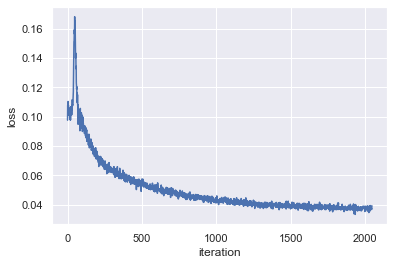

reconstruction loss is:


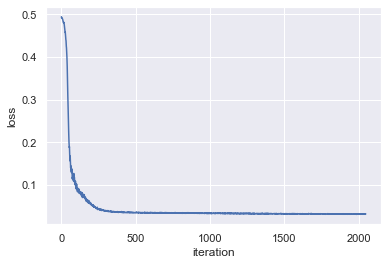

Notice that you are using parameters: mode=overall and adaptive=True
Model is saved without defined name
Start adaptive training for all the samples
Adaptive stage is done


In [4]:
sigm, tape_pred = Deconvolution('GSE67835.h5ad', expr.T,
                             adaptive=True,mode='overall')

In [5]:
_.to_csv('')

,A1BG,A1BG-AS1,A2M,A2ML1,A4GALT,A4GNT,AAAS,AADACL2,AAGAB,AAK1,...,ZSCAN29,ZSCAN30,ZSCAN5A,ZSWIM1,ZSWIM7,ZWILCH,ZWINT,ZXDC,ZYX,ZZEF1
Astrocytes,0.116086,0.192578,1.000000,1.000000,0.000000,0.000000,0.098717,0.019000,0.000000,0.647897,...,0.000000,0.298708,0.033580,0.910807,0.064151,0.065507,0.035769,0.000000,1.000000,0.555880
Endothelial,0.354475,0.000000,0.000000,0.013119,0.000000,0.047443,0.384443,0.000000,0.428742,0.531090,...,0.381969,0.000000,0.299320,0.000000,0.410641,0.000000,0.370409,0.461387,0.000000,0.487605
ExNeurons,0.764097,0.109428,0.112355,0.100547,0.000000,0.240403,0.749772,0.000000,0.179087,0.914701,...,0.300352,0.000000,0.633534,0.000000,0.420553,0.000000,0.319470,0.000000,0.000000,0.756819
InNeurons,0.888733,0.410464,0.798031,0.103443,0.000000,0.000000,0.000000,0.058227,0.000000,1.000000,...,0.000000,0.000000,0.424418,0.686307,0.000000,0.000000,0.000000,0.000000,0.674736,0.467201
Microglia,0.365524,0.191780,1.000000,0.476977,0.000000,0.000000,0.522927,0.017788,0.652580,0.850629,...,0.463258,0.525845,0.147845,0.514416,0.504133,0.622770,0.643430,0.753193,0.652387,0.623695
OPC,0.397245,0.160481,0.947518,0.495210,0.000000,0.000000,0.707954,0.000000,0.571469,0.809730,...,0.543277,0.568738,0.424077,0.595440,0.596479,0.546749,0.698122,0.756217,0.608064,0.640426
Oligodendrocytes,0.000000,0.228270,0.922021,0.441627,0.166493,0.000000,0.000000,0.153833,0.000000,0.000000,...,0.000000,0.906126,0.000000,0.627173,0.000000,0.838749,0.000000,0.000000,0.799992,0.000000
Unknown,0.478878,0.132406,1.000000,0.445902,0.000000,0.044332,0.613491,0.000000,0.596544,0.759030,...,0.607344,0.307297,0.318728,0.468780,0.679628,0.613408,1.000000,0.805923,0.454254,0.732862


In [4]:
scaden_pred = ScadenDeconvolution('../ref/humanbrain_ref.txt', expr.T)

Reading single-cell dataset, this may take 1 min
Reading dataset is done
Generating random cell fractions for each pseudo-bulk sample
Generating cell frations is done
Sampling cells to compose pseudo-bulk data


5000it [00:25, 194.24it/s]


Sampling is done
Reading training data
Reading is done
Reading test data
Reading test data is done
Using counts data to train model
Variance Cutoff
Find intersected genes
Intersected gene number is  11417
Log2 & MinMax scale
training data shape is  (5000, 11417) 
test data shape is  (639, 11417)
train model256 now


100%|██████████| 128/128 [00:33<00:00,  3.78it/s]


train model512 now


100%|██████████| 128/128 [00:35<00:00,  3.59it/s]


train model1024 now


100%|██████████| 128/128 [00:39<00:00,  3.23it/s]

Training of Scaden is done


In [8]:
scaden_pred.to_csv('ROSMAPpred_scaden.csv')

In [9]:
tape_pred.to_csv('ROSMAPpred_tape.csv')